# User Churn Prediction
#### In this notebook, I demonstrate how to use tree-ensemble methods to predict user churn rate from telecom usage data.

The two main packages used are **pandas** and **sklearn**.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn import metrics

First, we load the csv data and examine the date features.

In [2]:
churn_df = pd.read_csv('data/churn.all')

In [3]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null object
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null object
intl_plan                        5000 non-null object
voice_mail_plan                  5000 non-null object
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes           

In [ ]:
print ("%d data" % churn_df.shape[0])
print ("%d columns (%d features)" %(churn_df.shape[1], churn_df.shape[1]-1))

We see that there are 5000 samples in total. We have 20 available features, and 1 binary predcitor (churn/ not churn). Next, we are going to clean and preprocess the data. Specifically, the "Yes/No" and "True/False" type features can be converted into binary representation. 

In [5]:
def convert_bool(string):
    string = string.lower()
    print(string)
    if 'yes' in string or 'true' in string:
        return 1
    elif 'no' in string or 'false' in string:
        return 0
    else:
        return float('nan')

In [6]:
# convert yes/no true/false to boolean values
churn_df['voice_mail_plan'] = churn_df['voice_mail_plan'].apply(convert_bool)
churn_df['intl_plan'] = churn_df['intl_plan'].apply(convert_bool)
churn_df['churned'] = churn_df['churned'].apply(convert_bool)

 yes
 yes
 no
 no
 no
 no
 yes
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 yes
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 yes
 yes
 yes
 no
 yes
 no
 no
 yes
 no
 no
 no
 yes
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 yes
 yes
 yes
 no
 yes
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 yes
 no
 yes
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 yes
 yes
 yes
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 yes
 no
 no
 yes
 no
 no
 no
 no
 no
 yes
 no
 yes
 no
 no
 no
 no
 no
 no
 yes
 no
 yes
 yes
 no
 yes
 yes
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 yes
 no
 no
 yes
 no
 no
 yes
 yes
 no
 yes
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 yes
 no
 no
 yes
 no
 yes
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 yes
 yes
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 yes
 yes
 yes
 no
 yes
 no
 no
 no


 no
 no
 no
 yes
 yes
 no
 no
 no
 no
 yes
 yes
 no
 yes
 no
 yes
 no
 no
 yes
 no
 yes
 yes
 no
 no
 no
 yes
 yes
 no
 no
 no
 yes
 yes
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 yes
 yes
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 yes
 no
 no
 no
 yes
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 yes
 no
 no
 yes
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 yes
 no
 yes
 no
 no
 yes
 yes
 yes
 no
 no
 no
 no
 no
 yes
 no
 yes
 yes
 no
 yes
 yes
 no
 no
 no
 yes
 no
 no
 yes
 no
 yes
 yes
 no
 no
 no
 no
 no
 no
 yes
 yes
 yes
 yes
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 yes
 yes
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 yes
 yes
 no


 yes
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 yes
 no
 no
 yes
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 yes
 no
 yes
 no
 no
 no
 no
 no
 no
 yes
 yes
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 yes
 yes
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 yes
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 yes
 yes
 no
 no
 no
 no
 no
 yes
 yes
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 yes
 yes
 no
 yes
 no
 yes
 yes
 yes
 yes
 yes
 no
 yes
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 yes
 yes
 yes
 yes
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 yes
 no
 no
 yes
 no
 yes
 no
 no
 no
 no
 yes
 yes
 no
 yes
 no
 yes
 no
 yes
 no
 no
 no
 no
 yes
 no
 no
 no
 yes
 yes
 no
 no
 yes
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 ye

 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 yes
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 yes
 no
 no
 no
 yes
 no
 yes
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 yes
 yes
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 

 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 yes
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 yes
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 yes
 yes
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 yes
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 yes
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 no
 no
 no
 no
 no
 no
 no
 no
 no
 yes
 no
 yes
 no
 no
 no
 no

 false.
 false.
 false.
 false.
 false.
 true.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 true.
 false.
 false.
 false.
 false.
 true.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 true.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 true.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 true.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 true.
 false.
 true.
 true.
 true.
 true.
 true.
 false.
 false.
 true.
 true.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 true.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.

 false.
 false.
 false.
 false.
 true.
 false.
 false.
 false.
 false.
 true.
 false.
 false.
 false.
 true.
 false.
 false.
 false.
 false.
 false.
 false.
 true.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 true.
 false.
 false.
 false.
 true.
 true.
 false.
 false.
 false.
 false.
 false.
 false.
 true.
 false.
 false.
 false.
 true.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 true.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 true.
 false.
 false.
 false.
 false.
 false.
 true.
 false.
 true.
 true.
 false.
 true.
 false.
 false.
 true.
 true.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 false.
 

Now that we've succesfully updated the data feature space, we can quickly view the updates by using <code>head()</code>. We can also get an estimate of whether data is balanced by examining the percentage of <code>churned</code> = 1.

In [7]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
print('Churn rate: %d/%d' %(np.sum(churn_df['churned'] == 1), churn_df.shape[0]))

Churn rate: 707/5000


We dropped 3 features which were deemed irrelevant to the predection (the *state* feature may be added back in the future as a categorical feature), and separated out the features `churn_X` and label `churn_Y`. 

In [9]:
# Drop some useless columns
to_drop = ['state','area_code','phone_number','churned']
churn_X = churn_df.drop(to_drop, axis=1)
churn_Y = churn_df['churned']

We can quickly visualize the distribution of each feature as well as the correlation by calling `hist()` and `corr()`.

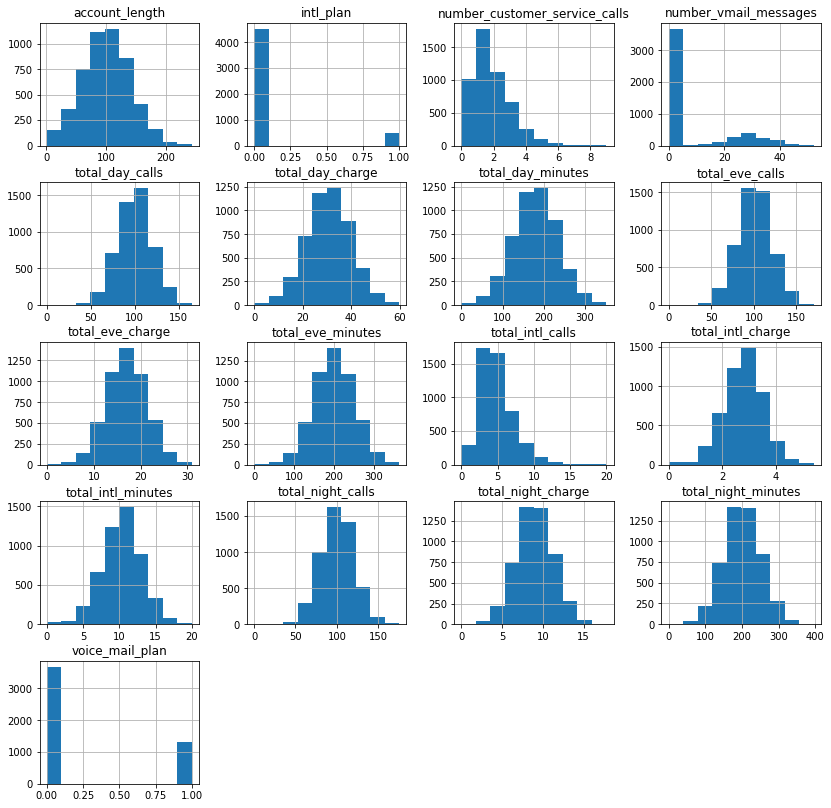

In [10]:
hist = churn_X.hist(figsize = (14, 14))

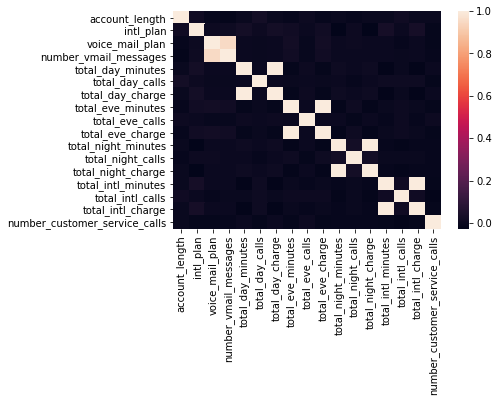

In [11]:
corr = churn_X.corr()
sns.heatmap(corr)

Next, the 5000 data samples are split into training and validation sets (4/1).

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(churn_X, churn_Y, test_size=0.2)

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 4000 observation with 17 features
test data has 1000 observation with 17 features


When choosing the machine learning models, I focused on several tree-based models because of their superior perforamance compared to logistic regression and SVM without fine tuning hyper-parameters.

In [13]:
#clf_logistic = LogisticRegression()
clf_RF = RandomForestClassifier()
#clf_SVM = SVC(kernel='linear', C=1)
clf_gb = GradientBoostingClassifier()
clf_ab = AdaBoostClassifier()

To select the best model, I used 5-fold cross-validation, and selected the mean F1 score of each model as the metric to compare different models. I used the F1 score because I think both the precision and recall are important to the user churn rate prediction. Since the dataset was not overly imbalanced (around 14% positive reponses), I did not apply special treatment to the weights.

In [15]:
model_names = ['RF', 'GB', 'AB']
model_list = [clf_RF, clf_gb, clf_ab]

count = 0
for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
    print('Binary F1 score of %s is: %.3f'%(model_names[count], cv_score.mean()))
    count += 1

Binary F1 score of RF is: 0.776
Binary F1 score of GB is: 0.815
Binary F1 score of AB is: 0.463


After the initial attempt, we found that the gradient boosting (GB) model performs the best. Therefore, I chose to further fine tune the GB model to achieve higher F1 score. I leveraged the `GridSearchCV` function to gradually narrow down the optimal hyper-parameters, which include `n_estimators`, `max_depth`, `min_samples_split` and `min_samples_leaf`.

In [16]:
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [25]:
parameters = {
    'learning_rate' : [0.1, 0.05, 0.2],
    'n_estimators' : [100, 200, 500, 1000],
    #'min_samples_split': [3],
    'min_samples_leaf': [2, 3]
}

Grid = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, scoring='f1', cv=5)
Grid.fit(X_train, y_train)

print_grid_search_metrics(Grid)
best_model = Grid.best_estimator_

Best score: 0.822
Best parameters set:
	learning_rate: 0.2
	min_samples_leaf: 2
	n_estimators: 1000


After the best model is chosen, I used the best model to fit the whole training data, and calculated the importance of each feature by referencing the `feature_importances_` field. The top 3 most important features are **number of customer service calls**, **total evening minutes** and **total day minutes**.

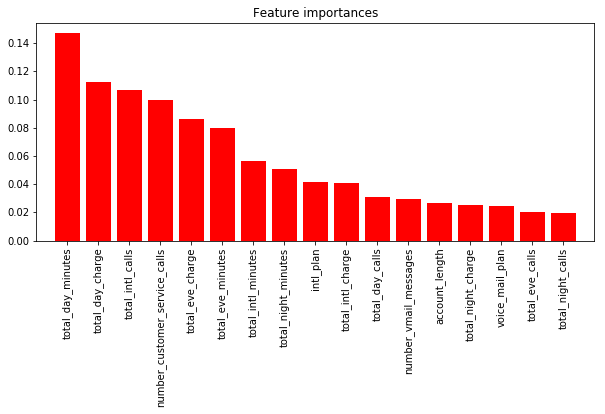

In [22]:
model = clf_gb
#model = best_model
model.fit(X_train, y_train)
importances = model.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=[10, 4])
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", 
        #yerr=std[indices], 
        align="center")
labels = [list(churn_X)[i] for i in indices]
plt.xticks(range(X_train.shape[1]), labels, rotation=90)

plt.xlim([-1, X_train.shape[1]])
plt.show()

I plotted the ROC curve, and calculated the AUC to be 0.922 for the best model. The AUC of the initial GB model without fine tuning was around 0.77. We can conclude that the fine-tuning improved the model performance significantly.

0.9202985146450225


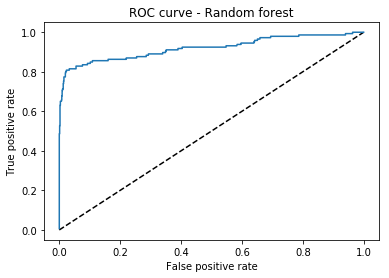

In [23]:
y_pred_rf = model.predict_proba(X_test)[:, 1] # col0 = class 0; col1 = class 1
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
print(metrics.auc(fpr_rf,tpr_rf))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Finally, I plotted the confusion matrix, where the predictions were made on the validation set. We can see that of all the churned samples, 75% of them were correctly identified. The type I error (false positive) is less than the type II error (false negative), which implies that the precision is higher than the recall. We achieved an overall accuracy of 95.4%.

In [ ]:
y_pred = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not churned', 'Churned'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()